In [4]:
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# 이미지 파일 경로 설정
image_path = 'sampling-graphic-2.jpg'

# 이미지 불러오기
img = Image.open(image_path)

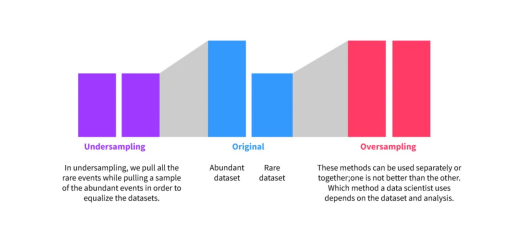

In [3]:
# 이미지 표시
plt.imshow(img)
plt.axis('off')  # 축을 숨김
plt.show()


- 정답 데이터셋에 대해서 불균형하다!?
- 우리가 예측하려는 타겟(라벨,레이블,y값,종속변수) 불균형하다.
- 내가 학습할 정답이 불균형한데 왜 sampling을 해야 하는가?

- 통상적으로 예측하는 경우는 대부분 소수의 경우를 예측하는 경우가 많다.
    - 사기건, 비정상, 이탈 등등 기본적으로 소수의 이벤트를 예측하는 경우가 많다.
    - 금융사기 -> 98명 정상 , 2명 사기
    - 우리는 그 2명을 예측
    - 예측하려는 정답이 불균형하다. 
    
- 샘플링을 하지 않으면 어떤 문제로 인해서 샘플링을 해야 하는가?
    - 머신이 제대로 학습을 하기 어렵다.
    - 정확도의 이슈 
        - 일반적으로 기계학습 0, 1에 대한 클래스의 중요도에 대한 차별을 두지 않는다.
        - 타이타닉데이터 1이 생존 0이 생존하지 않음 , 어디에 가중치를 두진 않았다.
        - 정답 9:1 상관없이 다 학습한다.
        - 우리는 9:1 중에서 1을 잘 예측하는게(분류) 중요하다.
        - 모델은 전체적인 정확도를 보면 9를 예측하는 것도 잘 한 것이라고 정확도가 측정된다.
        - 클래스가 불균형 하게 되면 9:1로 예측하여 정확도를 측정하면 90% 이상이 나올 수 있다.
            - 이 수치가 과연 정말 높은 수치인가?
    - A모델 90%의 비중을 80% 정확하게 분류하고, 10% 비중을 100% 정확하게 분류
    - B모델 90%의 비중을 90% 정확하게 분류하고, 10% 비중을 50% 정확하게 분류한다.
    - 90%의 비중을 분류하는 게 조금 떨어지더라도 10% 비중을 100% 정확하게 분류(예측)하는 게 더 적합할 수 있다.
    
----
- 클래스의 불균형 어떻게 해결하면 될까?
    - sampling 방법 
        - 우리가 수업시간에 배울 내용!
    - 가중치 밸런싱 -> 클래스에 대해서 가중치를 두게 된다. 
    

### Random_undersampling

- over -비중이 작은 클래스를 비중이 큰 클래스만큼 복제해서 학습
    - 1(사기) 1,000개 이면 -> 복제 샘플링 -> 10,000개 
    - 1과 0이 10,000개 , 10,000 -> 20,000개의 데이터로 학습
    - 데이터가 더 많아지는 케이스 
    - 1,000개 데이터셋을 10,000개로 늘렸지만 -> 중복되는 데이터가 분명 섞일 것
    - 1,000 x 10개 => 1,000개로 늘린거라 새로운 데이터가 아니다.
    
- under - 비중이 큰 클래스를 작은 비중의 클래스만큼 추출해서 학습
    - 1(사기)이 1,000개 , 0(정상)이 10,000개
    - 1(사기)이 1,000개 , 0(정상) 1,000개 
    - 데이터의 패턴이 조금은 줄어들 수 있다.
    

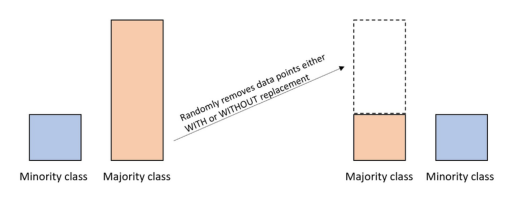

In [5]:
# 이미지 파일 경로 설정
image_path = 'Random-undersampling-process.jpg'

# 이미지 불러오기
img = Image.open(image_path)
# 이미지 표시
plt.imshow(img)
plt.axis('off')  # 축을 숨김
plt.show()


### Random_over_sampling

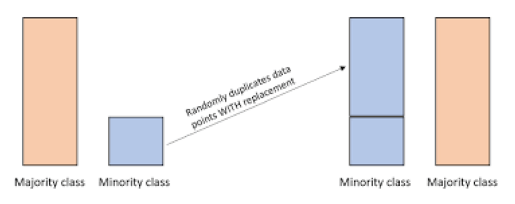

In [6]:
# 이미지 파일 경로 설정
image_path = 'oversample.jpg'

# 이미지 불러오기
img = Image.open(image_path)
# 이미지 표시
plt.imshow(img)
plt.axis('off')  # 축을 숨김
plt.show()

- random-over-sampling
    - 데이터 커지지만, 단순하게 동일한 관측치가 복제되는 것
    - 정보의 양이 증가하는 건 아니다. 
    - 정보의 손실은 없다 -> 과적합이 될 수 있다.
    - 간단하긴 하지만 좋은 샘플링 방법이라 보기에는 아쉬울 수 있다.
    
    - 2x = 6 , x = 3
    - 6x =18 , x = 3 
    
---
- 이러한 문제점을 해결하기 위해서 아래 샘플링 방법들이 발전하게 되었다.

### SMOTE(Synthetic Minority Over-Sampling Technique

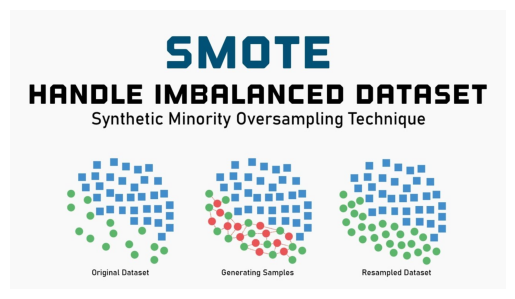

In [7]:
# 이미지 파일 경로 설정
image_path = 'smote.jpg'

# 이미지 불러오기
img = Image.open(image_path)
# 이미지 표시
plt.imshow(img)
plt.axis('off')  # 축을 숨김
plt.show()

- 대표적인 oversampling
    - 어떤 식으로 작동하는가?
        - KNN방식 ( K-Nearest-Neighbors 기법 ) 
    - 비중이 작은 클래스 ( 사기 ) K최근접 이웃 -> 찾아서 그 이웃의 관측치들 사이의 값들을 새로운 데이터 관측치로 생성하는 것
    - 이웃들 사이의 선에서 가상의 합성 샘플을 생성한다. -> 사기에대한 관측치가 증가, 이를 반복 원하는 데이터셋까지 만드는 것
    - 클래스의 경계의 있는 관측치들만 이용하여 샘플링하는 방식도 있다. - boderline SMOTE 

### ADASYN (Adaptive Synthetic Sampling Approach)

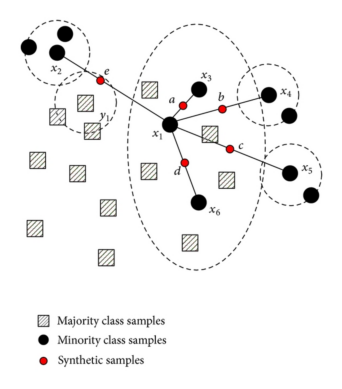

In [8]:
# 이미지 파일 경로 설정
image_path = 'adasyn.jpg'

# 이미지 불러오기
img = Image.open(image_path)
# 이미지 표시
plt.imshow(img)
plt.axis('off')  # 축을 숨김
plt.show()

- SMOTE 방식을 조금 더 발전 시킨 방식
- SMOTE 방식에서 -> Over Sampling할 관측치의 양을 조절하고 싶다. 조절 할 수 있는 점이 장점이이다.

- 작동방식
    - 불균형 정도를 파악한다. 
        - 소수 클래스의 샘플이 전체 데이터셋에서 차지하는 비율 게산
        - 전체에서 소수가 10% =0.1 불균형 정도 

    - 소수의 클래스마다 k-최근접 이웃 계산
        - 소수의 클래스 계산하면 KNN으로 -> 다수의 클래스 샘플이 얼마나 많이 포함 되어 있나?
        - 다수의 샘플비율 Ri
        - 다수의 클래스의 샘플수 비율 
    - 샘플링에 대한 비율 계산 
        - 소수 샘플에 대한 생성할 샘플의 수를 결정하기 위해서 위의 Ri 값을 사용한다.
        - 샘플링의 비율을 결정 
        - (1/n x ri) = g
    - 새로운 샘플을 생성
        - 기존의 소수 클래스 샘플과 그 이웃 사이에서 생성

- 기존 데이터셋으로 학습한 것과 under, over 학습한 것
    - 분명 데이터셋의 난수가 바뀌면, 테스트하면 성능이 달라진다.
    - 분명 성능의 편차가 존재한다.
    - 평가 척도의 표준편차와 같은 것들도 같이 보조지표로 사용하면 좋다.

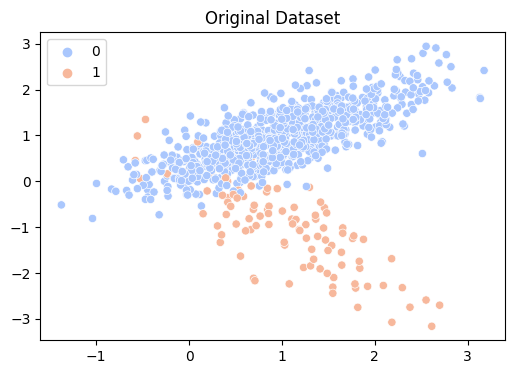

Original class distribution: Counter({0: 901, 1: 99})


In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 불균형한 데이터셋 생성
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=1)

# 클래스 비율 시각화
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm')
plt.title("Original Dataset")
plt.show()

print(f"Original class distribution: {Counter(y)}")


In [1]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [4]:
# 랜덤 오버샘플링
ros = RandomOverSampler(random_state=111)
X_ros, y_ros =ros.fit_resample(X,y)

# SMOTE 
smt =SMOTE(random_state=111)
X_smt, y_smt =smt.fit_resample(X,y)

# ADASYN
ads=ADASYN(random_state=111)
X_ads, y_ads=ads.fit_resample(X,y)

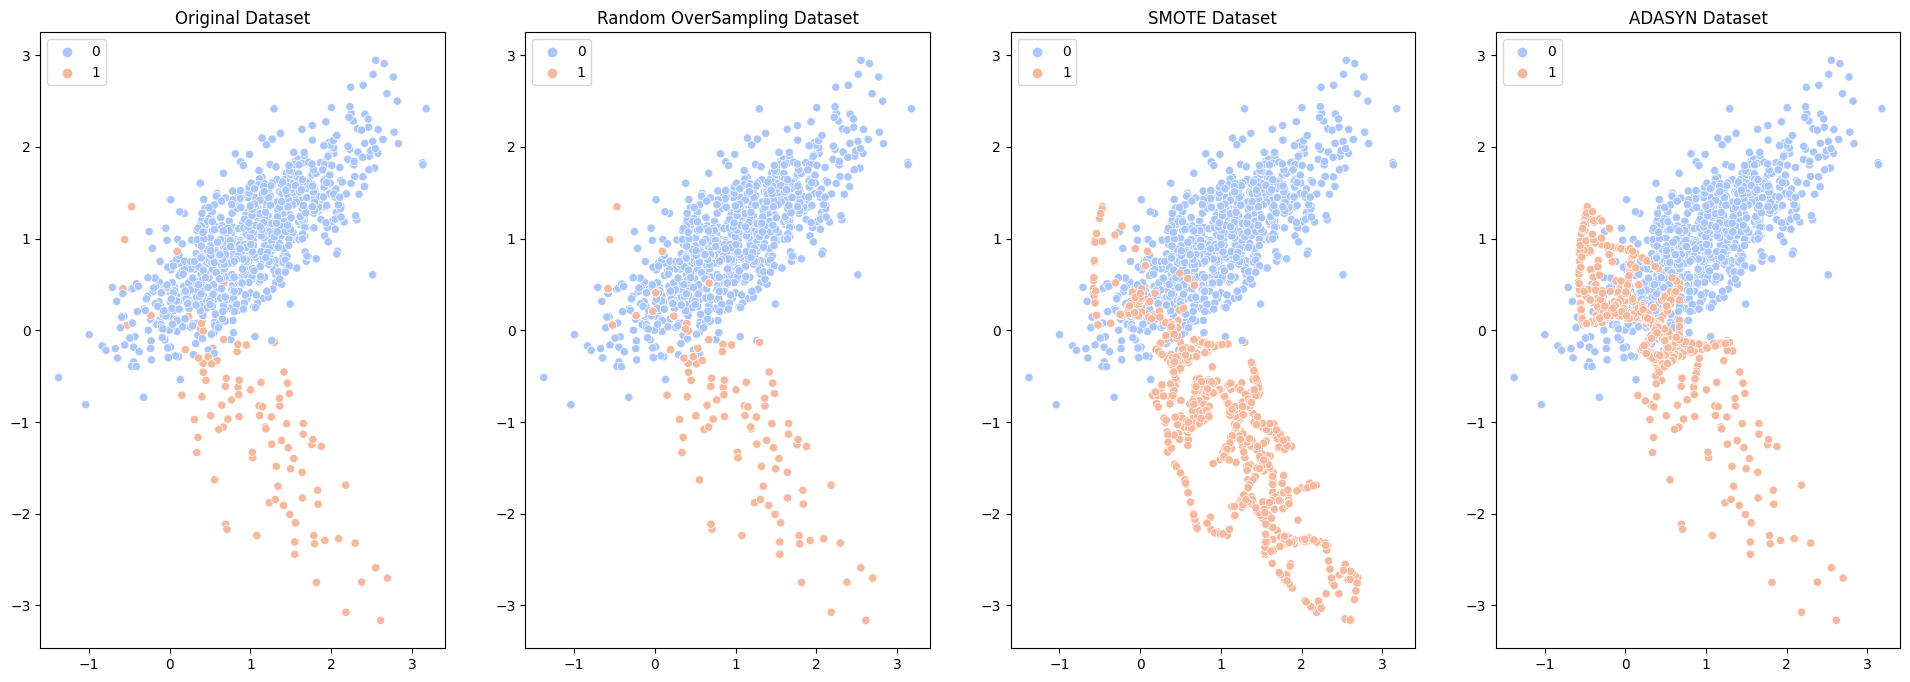

In [7]:
## 각 샘플링 기법에 대한 시각화
fig, axes = plt.subplots(1,4, figsize=(24,8))

#원본 데이터
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='coolwarm', ax=axes[0])
axes[0].set_title('Original Dataset')

#랜덤 오버 샘플링
sns.scatterplot(x=X_ros[:,0], y=X_ros[:,1], hue=y_ros, palette='coolwarm', ax=axes[1])
axes[1].set_title('Random OverSampling Dataset')

#SMOTE
sns.scatterplot(x=X_smt[:,0], y=X_smt[:,1], hue=y_smt, palette='coolwarm', ax=axes[2])
axes[2].set_title('SMOTE Dataset')


#ADASYN
sns.scatterplot(x=X_ads[:,0], y=X_ads[:,1], hue=y_ads, palette='coolwarm', ax=axes[3])
axes[3].set_title('ADASYN Dataset')

plt.show()

In [2]:
# 불균형한 데이터셋 생성
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=1)


In [10]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_validate
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [11]:
from imblearn.under_sampling import RandomUnderSampler

In [16]:
##파이프라인 설치
pipeline_base =Pipeline([
    ('scaler',StandardScaler()),
    ('model',LogisticRegression(random_state=111))
])

#over smote
pipeline_smote =Pipeline([
    ('scaler',StandardScaler()),
    ('smote',SMOTE(random_state=111)),
    ('model',LogisticRegression(random_state=111))
])

#under random
pipeline_under =Pipeline([
    ('scaler',StandardScaler()),
    ('under',RandomUnderSampler(random_state=111)),
    ('model',LogisticRegression(random_state=111))
])

# 교차검증

cv =StratifiedKFold(n_splits =5, shuffle= True , random_state=111)

# 성능 평가
score_base =cross_validate(pipeline_base, X,y, cv=cv, scoring= ['accuracy','precision','recall','f1'])


In [19]:
## 샘플링이 없는 경우
print('샘플링이 없는 경우')
print(f"Accuracy : {score_base['test_accuracy'].mean():.4f} {score_base['test_accuracy'].std():.4f}")
print(f"precision : {score_base['test_precision'].mean():.4f} {score_base['test_precision'].std():.4f}")
print(f"recall : {score_base['test_recall'].mean():.4f} {score_base['test_recall'].std():.4f}")
print(f"f1 : {score_base['test_f1'].mean():.4f} {score_base['test_f1'].std():.4f}")

샘플링이 없는 경우
Accuracy : 0.9720 0.0093
precision : 0.9646 0.0290
recall : 0.7479 0.1040
f1 : 0.8370 0.0669


In [23]:
score_base =cross_validate(pipeline_smote, X,y, cv=cv, scoring= ['accuracy','precision','recall','f1'])
## smote
print('SMOTE')
print(f"Accuracy : {score_base['test_accuracy'].mean():.4f} {score_base['test_accuracy'].std():.4f}")
print(f"precision : {score_base['test_precision'].mean():.4f} {score_base['test_precision'].std():.4f}")
print(f"recall : {score_base['test_recall'].mean():.4f} {score_base['test_recall'].std():.4f}")
print(f"f1 : {score_base['test_f1'].mean():.4f} {score_base['test_f1'].std():.4f}")

SMOTE
Accuracy : 0.9260 0.0174
precision : 0.6013 0.1007
recall : 0.8995 0.0771
f1 : 0.7104 0.0420


In [22]:
score_base =cross_validate(pipeline_under, X,y, cv=cv, scoring= ['accuracy','precision','recall','f1'])
## smote
print('Under')
print(f"Accuracy : {score_base['test_accuracy'].mean():.4f} {score_base['test_accuracy'].std():.4f}")
print(f"precision : {score_base['test_precision'].mean():.4f} {score_base['test_precision'].std():.4f}")
print(f"recall : {score_base['test_recall'].mean():.4f} {score_base['test_recall'].std():.4f}")
print(f"f1 : {score_base['test_f1'].mean():.4f} {score_base['test_f1'].std():.4f}")

Under
Accuracy : 0.9080 0.0246
precision : 0.5363 0.0827
recall : 0.9295 0.0926
f1 : 0.6712 0.0530


- 샘플링이 없는 경우
Accuracy : 0.9720 0.0093
precision : 0.9646 0.0290
recall : 0.7479 0.1040
f1 : 0.8370 0.0669


----

- SMOTE
Accuracy : 0.9260 0.0174
precision : 0.6013 0.1007
recall : 0.8995 0.0771
f1 : 0.7104 0.0420

----

- Under
Accuracy : 0.9080 0.0246
precision : 0.5363 0.0827
recall : 0.9295 0.0926
f1 : 0.6712 0.0530

--- 
- precision - 양성으로 예측한 것 중에서 실제 양성인 비율?
- recall - 실제 양성인 것 중에서 모델이 얼마나 양성으로 예측했는지?